# **LabTest-Q4**

# **Linear Regression, Logistic Regression**

Logistic Regression Accuracy: 0.8690186536901865
Linear Regression Accuracy: 0.8629359286293593
MLP Classifier Accuracy: 0.8844282238442822


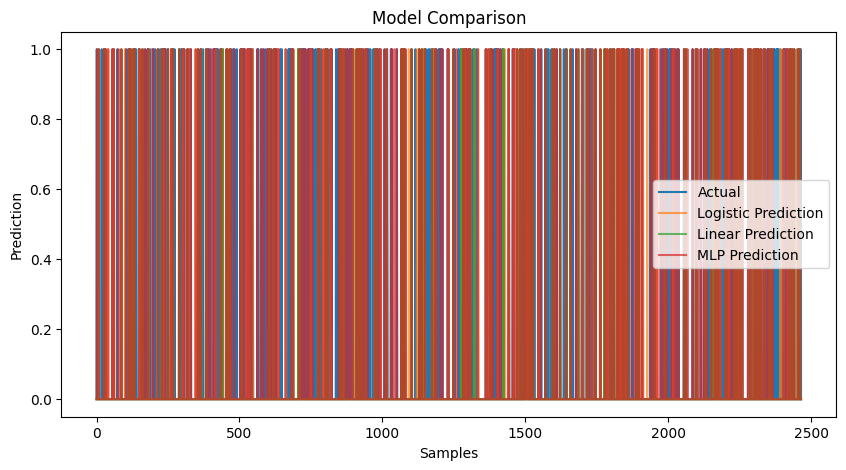

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Preprocessing
# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate models
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Linear Regression (transforming output back to binary for evaluation)
y_pred_linear_binary = [1 if x > 0.5 else 0 for x in y_pred_linear]
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_linear_binary))

# MLP Classifier
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred_logistic, label='Logistic Prediction', alpha=0.7)
plt.plot(y_pred_linear_binary, label='Linear Prediction', alpha=0.7)
plt.plot(y_pred_mlp, label='MLP Prediction', alpha=0.7)
plt.title('Model Comparison')
plt.xlabel('Samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

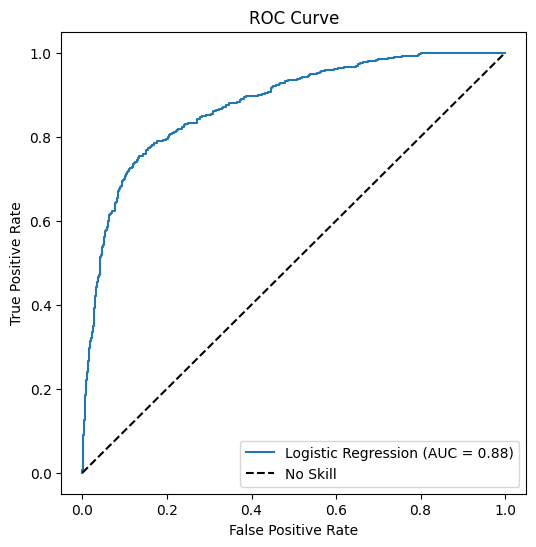

In [6]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression Model (continued from previous code)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Get probability of positive class

# ROC Curve for Logistic Regression
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC Curve (optional)
plt.figure(figsize=(6, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Linear Regression Mean Squared Error: 0.10166245153537601


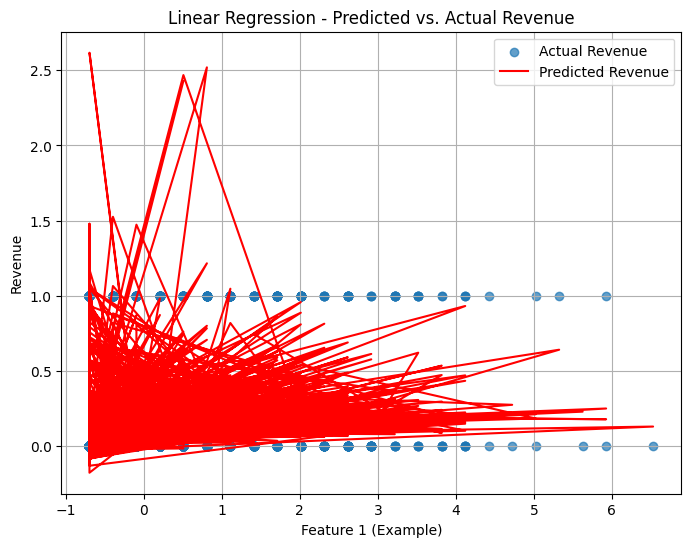

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Preprocessing
# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate model (mean squared error for linear regression)
mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse)

# Plotting results (focusing on linear regression)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, label='Actual Revenue', marker='o', alpha=0.7)  # Assuming X_test[:, 0] is the first feature
plt.plot(X_test[:, 0], y_pred_linear, label='Predicted Revenue', color='red')  # Assuming X_test[:, 0] is the first feature
plt.title('Linear Regression - Predicted vs. Actual Revenue')
plt.xlabel('Feature 1 (Example)')  # Adjust label based on your actual feature
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression Accuracy: 0.8690186536901865


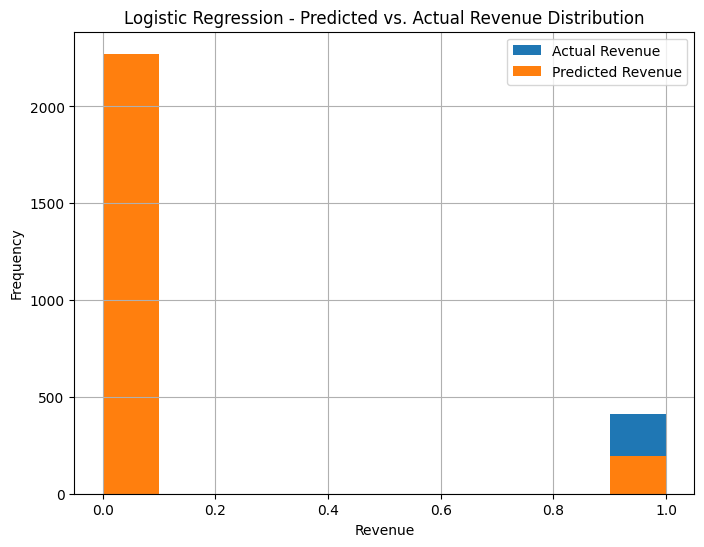

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Preprocessing
# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate model (accuracy for logistic regression)
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy)

# Plotting results (focusing on logistic regression)
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=10, label='Actual Revenue')  # Histogram of actual revenue
plt.hist(y_pred_logistic, bins=10, label='Predicted Revenue')  # Histogram of predicted revenue (0 or 1)
plt.title('Logistic Regression - Predicted vs. Actual Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


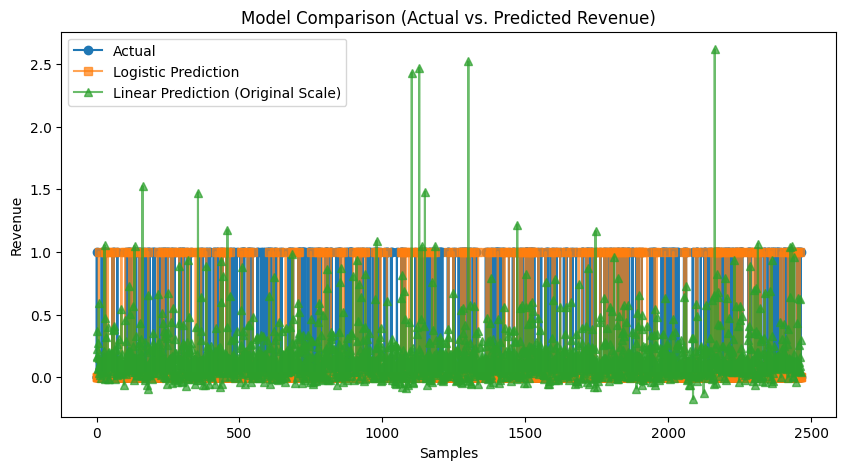

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Preprocessing
# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# MLP Classifier (not used for plotting linear regression and logistic regression)
# mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
# mlp_model.fit(X_train, y_train)
# y_pred_mlp = mlp_model.predict(X_test)

# Evaluate models (already included in your code)

# Plotting results (modified slightly)
plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o', linestyle='-')

# Plot Logistic Regression predictions
plt.plot(y_pred_logistic, label='Logistic Prediction', marker='s', alpha=0.7)

# Plot Linear Regression predictions (original values on y-axis)
plt.plot(y_pred_linear, label='Linear Prediction (Original Scale)', marker='^', alpha=0.7)

# Title, labels, and legend
plt.title('Model Comparison (Actual vs. Predicted Revenue)')
plt.xlabel('Samples')
plt.ylabel('Revenue')  # Adjusted label for y-axis
plt.legend()
plt.show()


# **KNN, SVM**

Logistic Regression Accuracy: 0.8690186536901865
MLP Classifier Accuracy: 0.883617193836172
KNN Accuracy: 0.8661800486618005
SVM Accuracy: 0.870235198702352
Naive Bayes Accuracy: 0.7907542579075426


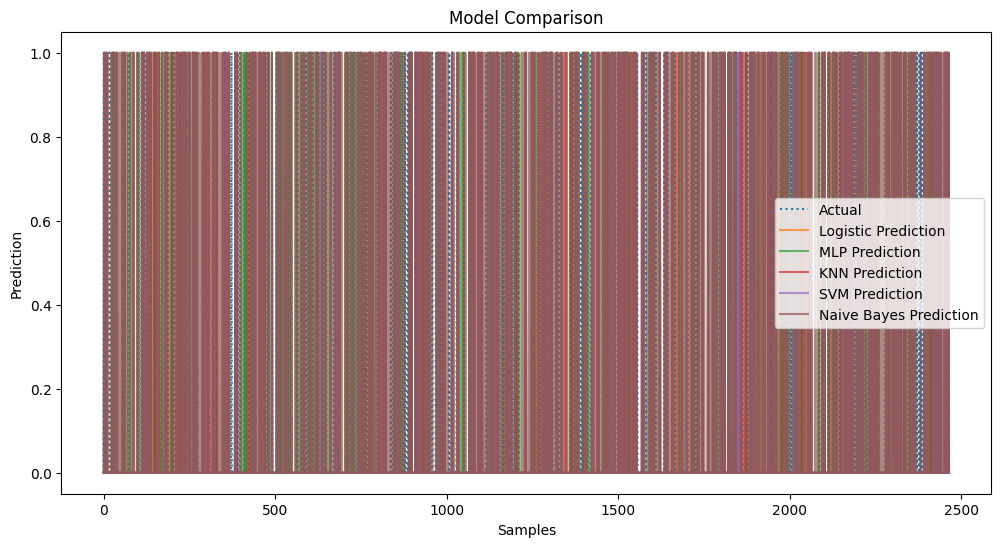

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Preprocessing
# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', linestyle=':')
plt.plot(y_pred_logistic, label='Logistic Prediction', alpha=0.7)
plt.plot(y_pred_mlp, label='MLP Prediction', alpha=0.7)
plt.plot(y_pred_knn, label='KNN Prediction', alpha=0.7)
plt.plot(y_pred_svm, label='SVM Prediction', alpha=0.7)
plt.plot(y_pred_nb, label='Naive Bayes Prediction', alpha=0.7)
plt.title('Model Comparison')
plt.xlabel('Samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

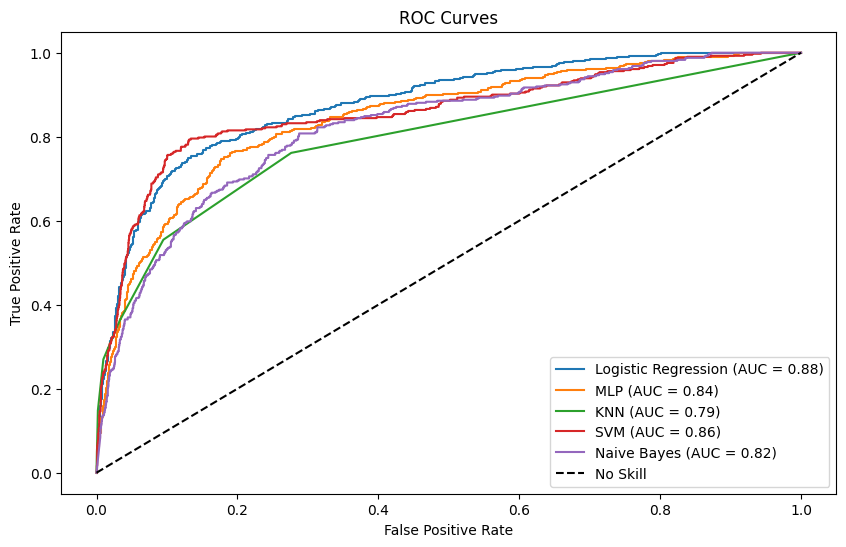

In [8]:
svm_model = SVC(kernel='linear', probability=True)  # Set probability to True
svm_model.fit(X_train, y_train)
svm_scores = svm_model.decision_function(X_test)  # Get decision scores
# Assuming higher scores indicate positive class
y_pred_proba_svm = np.exp(svm_scores) / (np.exp(svm_scores) + np.exp(-svm_scores))

# Rest of the ROC curve calculation using y_pred_proba_svm
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Naive Bayes
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()



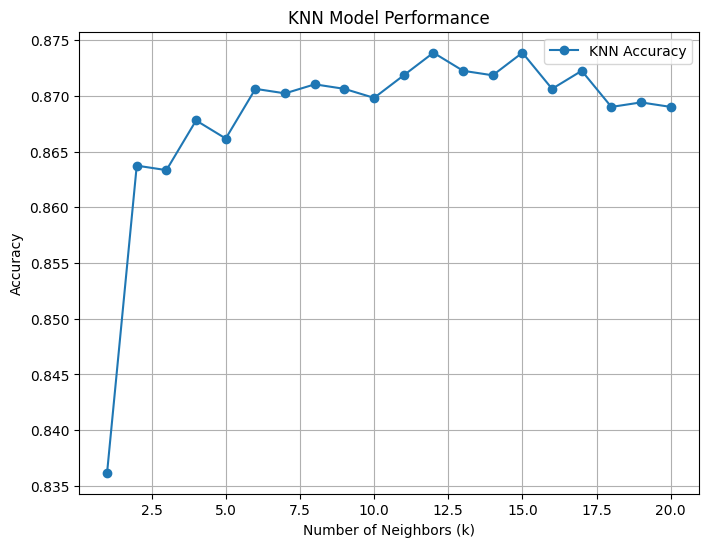

In [14]:
# KNN Accuracy for different k values
k_range = range(1, 21)  # Adjust the range as needed
k_accuracy = []
for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred_knn = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_knn)
  k_accuracy.append(accuracy)

# Plot KNN Accuracy vs n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(k_range, k_accuracy, marker='o', label='KNN Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Performance')
plt.legend()
plt.grid(True)
plt.show()


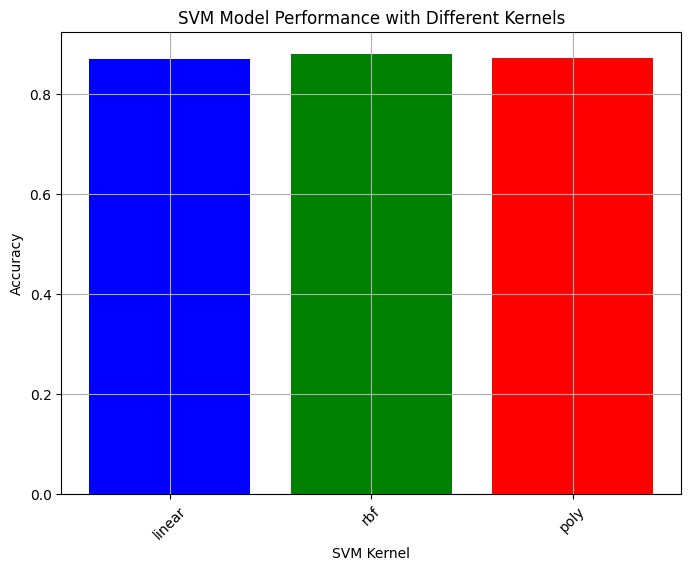

In [15]:
# Kernel types to evaluate
kernel_types = ['linear', 'rbf', 'poly']  # Adjust kernel types as needed

# Accuracy for different kernels
kernel_accuracy = {}
for kernel in kernel_types:
  svm_model = SVC(kernel=kernel)
  svm_model.fit(X_train, y_train)
  y_pred_svm = svm_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_svm)
  kernel_accuracy[kernel] = accuracy

# Plot accuracy vs kernel type
plt.figure(figsize=(8, 6))
plt.bar(kernel_types, kernel_accuracy.values(), color=['b', 'g', 'r'])  # Adjust colors as needed
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Model Performance with Different Kernels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


# **Perceptron Learning Model**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Split data into features and target
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue' is the target variable
y = df['Revenue'].astype(int)  # Ensuring the target is binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perceptron Model
perceptron_model = Perceptron(max_iter=1000, tol=1e-3)
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)

# Evaluate Perceptron Model
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))

Perceptron Accuracy: 0.8560421735604218


# **Multi Layer Perceptron Learning Model**

In [5]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate MLP Model
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

MLP Classifier Accuracy: 0.8576642335766423


# **Performing clustering task and measuring performance of the model**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encoding categorical variables if any
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Revenue', axis=1))  # Assuming 'Revenue' might not be included in clustering

# Split dataset into training and testing set
# It's common to cluster on the full dataset, but we'll split it to demonstrate performance measurement.
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Applying K-Means Clustering
# Choosing the number of clusters (k) is somewhat arbitrary, let's use k=3 for demonstration
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predict the clusters
clusters_train = kmeans.predict(X_train)
clusters_test = kmeans.predict(X_test)

# Evaluate the performance on the training data
silhouette_avg_train = silhouette_score(X_train, clusters_train)
print(f"Training Silhouette Score: {silhouette_avg_train:.3f}")

# Evaluate the performance on the testing data
silhouette_avg_test = silhouette_score(X_test, clusters_test)
print(f"Testing Silhouette Score: {silhouette_avg_test:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training Silhouette Score: 0.245
Testing Silhouette Score: 0.249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

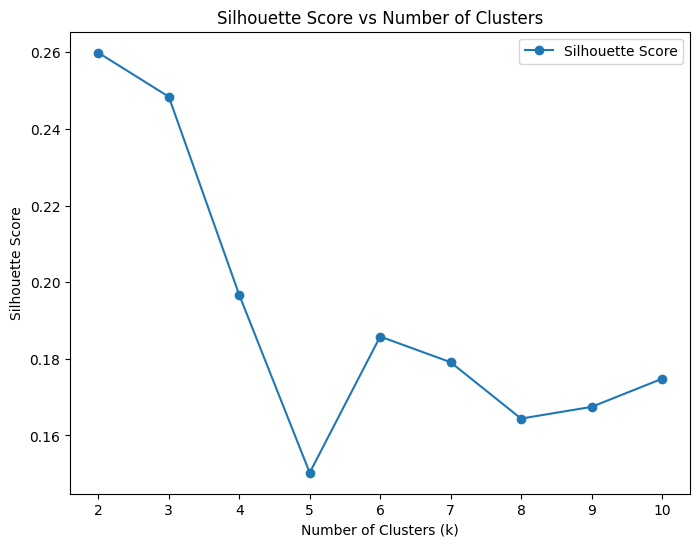

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to calculate and plot silhouette score for different k values
def plot_silhouette_scores(X):
  silhouette_scores = []
  k_range = range(2, 11)  # Adjust the range as needed

  for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

  # Plot silhouette scores vs number of clusters
  plt.figure(figsize=(8, 6))
  plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score vs Number of Clusters')
  plt.legend()
  plt.show()

# Call the function to plot silhouette scores
plot_silhouette_scores(X_scaled)


# **Inference**

**MLP Classifier model** has obtained the highest accuracy which is followed up be the **SVM model**.


The least accuracy is obtained by the **Linear Regression model** and **KNN mode**l.